In [1]:
# http://www.emergentmind.com/neural-network
# https://hmkcode.com/ai/backpropagation-step-by-step/
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [2]:
# Revisa la documentacion de python para poder instalar tensorflow.
# Quizas alguno de las siguientes lineas sean de utilidad, o usa la suite anaconda.
# !conda install tensorflow
# !pip install tensorflow

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [90]:
# We will use the variables x1=length and x2=width of the sepals as input vector x,
# and use them to predict y1=length and y2=width of the petals (output vector y).
# This is a multivariate-multiple regression scenario.
# We also keep the labels in a vector L, only for visualzation purposes.
iris = load_iris()
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


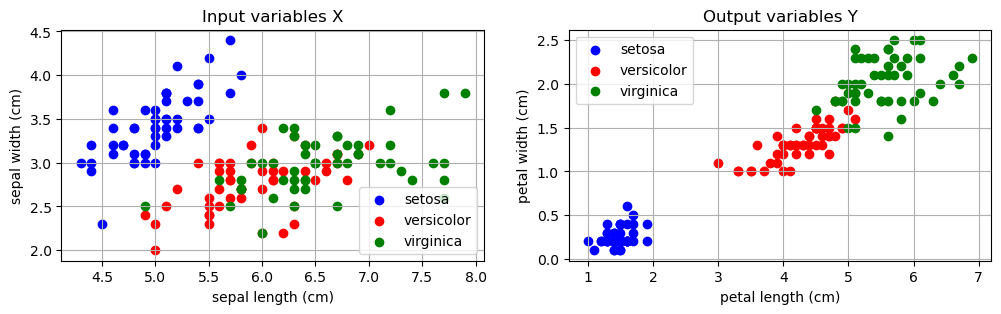

In [91]:
# Plot input and output variables
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.title('Input variables X')
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label=iris.target_names[0])
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label=iris.target_names[1])
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.subplot(1, 2, 2)
plt.title('Output variables Y')
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label=iris.target_names[0])
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label=iris.target_names[1])
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()

In [92]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.1)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (135, 2)
Test inputs X: (15, 2)
Training + validation outputs Y: (135, 2)
Test outputs Y: (15, 2)
Training + validation labels l: (135,)
Test labels l: (15,)


In [93]:
# Documentación de tensorflow y keras
# https://www.tensorflow.org/
# https://keras.io/

In [94]:
# import tensorflow an the classes Model, Input (place-holder layer), and Dense (fully connected layer)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [128]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### == Q1 ==
__Revisa la documentación de tensorflow: ¿qué tipo de activación tiene la capa de salida de la red que acabamos de crear?__

R= Activación lineal

### == Q2 ==
__Según la documentación de tensorflow (y/o el código de la siguiente celda), ¿Qué extructura de datos usa tensorflow para organizar las capas de una red?__

R= Tensores

In [129]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[-0.8717309  -0.65719736]
 [-0.6821338   0.05814815]]
Initial biases (2,)
[0. 0.]


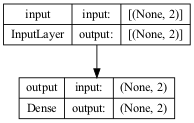

In [130]:
# Plot a diagram of the MLP model
from tensorflow.keras.utils import plot_model
plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [131]:
# Here we define the optimizer and loss function
# sgd and mse in this initial example
MLP.compile(optimizer='sgd', loss='mse')

In [132]:
# And now we train the model
# Learn to predict petal's lenght and width from sepal's lenght and width
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=20, validation_split=0.2)

Epoch 1/20
27/27 [==============================] - 0s 4ms/step - loss: 5.3872 - val_loss: 1.2198
Epoch 2/20
27/27 [==============================] - 0s 1ms/step - loss: 1.1147 - val_loss: 1.0621
Epoch 3/20
27/27 [==============================] - 0s 1ms/step - loss: 1.0316 - val_loss: 0.8567
Epoch 4/20
27/27 [==============================] - 0s 1ms/step - loss: 0.9153 - val_loss: 0.8774
Epoch 5/20
27/27 [==============================] - 0s 1ms/step - loss: 0.8535 - val_loss: 0.7032
Epoch 6/20
27/27 [==============================] - 0s 1ms/step - loss: 0.7044 - val_loss: 0.6789
Epoch 7/20
27/27 [==============================] - 0s 1ms/step - loss: 0.6784 - val_loss: 0.5890
Epoch 8/20
27/27 [==============================] - 0s 1ms/step - loss: 0.6310 - val_loss: 0.5487
Epoch 9/20
27/27 [==============================] - 0s 995us/step - loss: 0.5993 - val_loss: 0.5396
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5473 - val_loss: 0.4981
Epoch 11/20
27/27

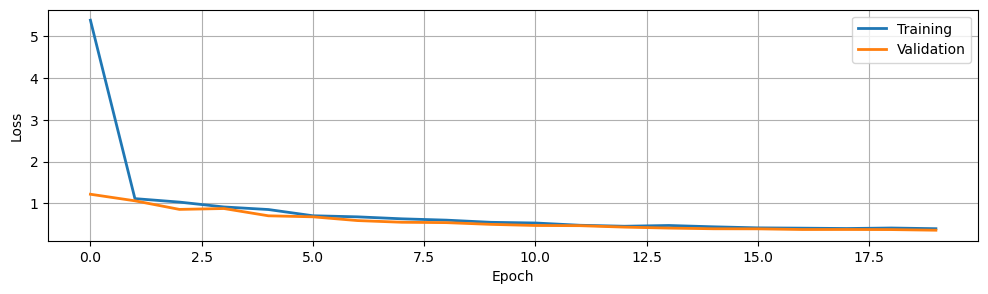

In [133]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [134]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.4137746   0.50112194]
 [-1.4508861  -0.5434813 ]]
Initial biases (2,)
[-0.10309779 -0.09634165]


In [135]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.17592106759548187

In [136]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

1/1 [==============================] - 0s 49ms/step
(15, 2)


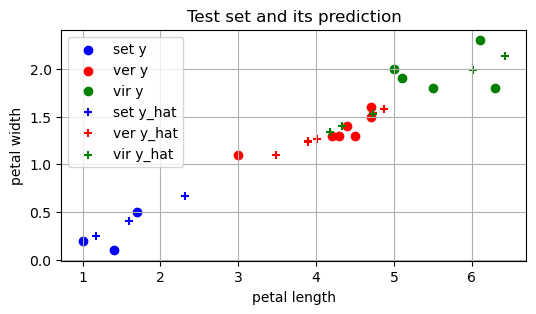

In [139]:
 # Plot y_test_hat
plt.figure(figsize=(6, 3))
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_hat')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_hat')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_hat')

plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Test set and its prediction')
plt.show()

### == Q3 ==
__En el ejercicio anterior le indicamos a tensorflow que separara 20% de los datos de entrenamiento para hacer validación. Dicho 20% es seleccionado de manera aleatoria. Revisa la documentación de la función .fit() para saber cómo puedes darle un subset de validación que no cambie entre diferentes corridas de entrenamiento. Reporta tu respuesta.__

R= Con el argumento __validation_data__ y eliminando el argumento __validation_split__.

In [142]:
# Create a larger MLP
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='relu', name='hidden1')(i)
h = Dense(units=64, activation='relu', name='hidden2')(h)
h = Dense(units=32, activation='relu', name='hidden3')(h)
o = Dense(units=2, activation='linear', name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden1 (Dense)             (None, 32)                96        
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse')

In [144]:
# Train it
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
27/27 - 0s - loss: 2.0329 - val_loss: 1.1707 - 218ms/epoch - 8ms/step
Epoch 2/20
27/27 - 0s - loss: 1.1493 - val_loss: 0.7453 - 36ms/epoch - 1ms/step
Epoch 3/20
27/27 - 0s - loss: 0.8958 - val_loss: 0.8350 - 40ms/epoch - 1ms/step
Epoch 4/20
27/27 - 0s - loss: 0.7334 - val_loss: 0.3872 - 36ms/epoch - 1ms/step
Epoch 5/20
27/27 - 0s - loss: 0.6986 - val_loss: 0.3143 - 67ms/epoch - 2ms/step
Epoch 6/20
27/27 - 0s - loss: 0.4082 - val_loss: 0.5515 - 30ms/epoch - 1ms/step
Epoch 7/20
27/27 - 0s - loss: 0.5801 - val_loss: 1.3243 - 29ms/epoch - 1ms/step
Epoch 8/20
27/27 - 0s - loss: 0.4733 - val_loss: 0.2618 - 29ms/epoch - 1ms/step
Epoch 9/20
27/27 - 0s - loss: 0.4393 - val_loss: 0.3395 - 30ms/epoch - 1ms/step
Epoch 10/20
27/27 - 0s - loss: 0.4400 - val_loss: 0.3279 - 30ms/epoch - 1ms/step
Epoch 11/20
27/27 - 0s - loss: 0.4260 - val_loss: 0.2577 - 30ms/epoch - 1ms/step
Epoch 12/20
27/27 - 0s - loss: 0.2835 - val_loss: 0.2287 - 34ms/epoch - 1ms/step
Epoch 13/20
27/27 - 0s - loss: 0.359

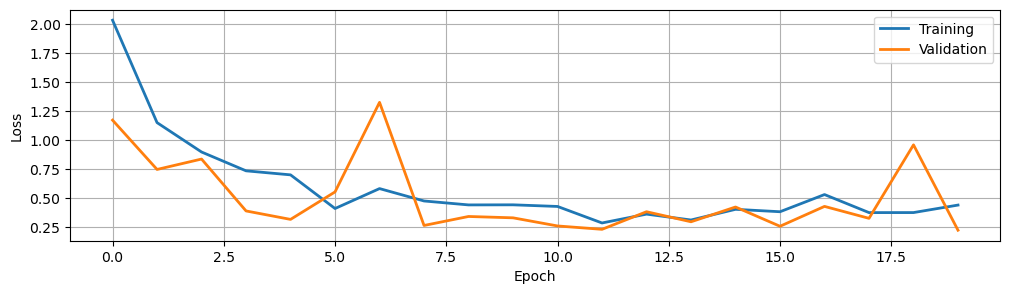

In [145]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [146]:
# Obtain weights and biases of the hidden layer
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t') #print(w)
  print("Biases:  ", b.shape) #print(b)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 64)	Biases:   (64,)
Weights:  (64, 32)	Biases:   (32,)
Weights:  (32, 2)	Biases:   (2,)


In [147]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.13894008100032806

In [149]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

1/1 [==============================] - 0s 24ms/step
(15, 2)


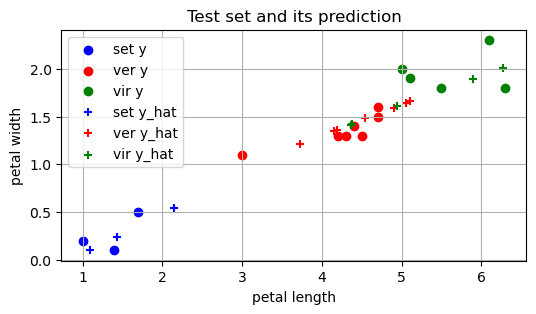

In [150]:
 # Plot y_test_hat
plt.figure(figsize=(6, 3))
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_hat')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_hat')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_hat')

plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Test set and its prediction')
plt.show()

### == Q4 == 
__Nota que esta segunda red, aunque más grande, parece generar peores resultados en comparación con la primera red. Encuentra la mejor combinación de hiperparámetros para minimizar el error tanto como sea posible. Reporta: número de capas, número de perceptrones en cada capa, número total de pesos, tamaño del lote, y número de épocas.__


In [151]:
# Auxiliar function to create an MLP
def create_MLP(n_units=[2, 1], hid_activations=None, last_activation=None):
  h = i = Input(shape=(n_units[0]))
  for units in n_units[1:-1]:
    h = Dense(units=units, activation=hid_activations)(h)
  o = Dense(units=n_units[-1], activation=last_activation)(h)
  return Model(inputs=i, outputs=o)

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_108 (Dense)           (None, 8)                 24        
                                                                 
 dense_109 (Dense)           (None, 4)                 36        
                                                                 
 dense_110 (Dense)           (None, 2)                 10        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


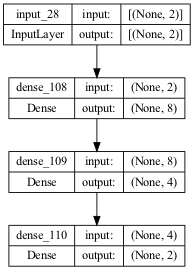

In [157]:
# Example using the function create_MLP()
MLP = create_MLP([2, 32, 16, 8, 2], hid_activations='sigmoid', last_activation='relu')
MLP.summary()

plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
# [2, 32, 16, 8, 4, 2]; batch_size=4, epochs=200, validation_split=0.2 -> Average --  train loss: 4.8648 +- 3.4672;  test loss: 5.2218 +- 4.2117
# [2, 8, 32, 16, 8, 4, 2]; batch_size=4, epochs=200, validation_split=0.2 -> Average --  train loss: 4.6602 +- 3.3445;  test loss: 4.9514 +- 4.0859
# [2, 4, 8, 16, 8, 4, 2]; batch_size=4, epochs=200, validation_split=0.2 -> Average --  train loss: 5.3751 +- 3.3875;  test loss: 5.8204 +- 4.1399
# [2, 32, 16, 8, 4, 2]; batch_size=4, epochs=200, validation_split=0.1 -> Average --  train loss: 4.6441 +- 3.5963;  test loss: 4.9694 +- 4.3508
# [2, 32, 16, 8, 4, 2]; batch_size=2, epochs=200, validation_split=0.1 -> Average --  train loss: 3.6965 +- 4.1280;  test loss: 4.1307 +- 4.7731

In [ ]:
# Corre el experimento 100 veces y registra el desempeño promedio y el tiempo de ejecución
loss = np.zeros((30, 2))
for ind in range(30):
  MLP = create_MLP([2, 32, 16, 8, 4, 2], hid_activations='sigmoid', last_activation='relu')
  MLP.compile(optimizer='sgd', loss='mse')
  MLP.fit(x=x_train, y=y_train, batch_size=2, epochs=250, verbose=0, validation_split=0.1)
  loss[ind, 0] = MLP.evaluate(x=x_train, y=y_train, verbose=False)
  loss[ind, 1] = MLP.evaluate(x=x_test, y=y_test, verbose=False)
  print(f"Run {ind+1:3d} -- ", end='')
  print(f"Train loss: {loss[ind, 0]:6.4f}", end='; ')
  print(f"Test loss: {loss[ind, 1]:6.4f}")

print("Average -- ", end='')
print(f" train loss: {loss[:, 0].mean():6.4f} +- {loss[:, 0].std():6.4f}", end='; ')
print(f" test loss: {loss[:, 1].mean():6.4f} +- {loss[:, 1].std():6.4f}")

### == Q5 ==
__De acuerdo con los resultados obtenidos después de correr el modelo 100 veces, ¿pareciera que el modelo es confiables/estable? ¿por qué si o por qué no?__

R= No pareciera ser confiable porque los errores son muy pequeños o muy grandes según el conjunto de datos usado para el entrenamiento y la validación. 

# Challenge. Now try the other way around.

In [10]:
# Use x1=length and x2=width of the petals as input vector x,
# and predict y1=length and y2=width of the sepals (output vector y).
# Find a good model for this prediction problem.